## Competitive MAML : An algorithm to learn an initialisation that adapts to the Nash Equillibria of multiple games

### Consider zero sum games and convex-concave functions of the form:
    
* $f(x,y) = (x-k)^2-(y-k)^2$
* $f_1(x,y) = (x-k)^2-(y-k)^2+(x-k)(y-k)$
* $f_2(x,y) = (x-k)^2*(y-k)$

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
#f
def oracle(x,y,k):
    gx = 2*(x-k)
    gy = 2*(y-k)
    return(np.array([gx,gy]))
#f1
def oracle_1(x,y,k):
    gx = 2*(x-k)+(y-k)
    gy = 2*(y-k)-(x-k)
    return(np.array([gx,gy]))

def oracle_2(x,y,k):
    gx = 2*(x-k)*(y-k)
    gy = 2*(x-k)
    return(np.array([gx,gy]))

## Update rule for FO Competitive MAML:

###    $x_{k+1/2} = x_k-\eta_1 \nabla_x f(x_k,y_k)$
###    And, $x_{k+1} = x_k-\eta_2 \nabla_x f(x_{k+1/2},y_{k+1/2})$

###    $y_{k+1/2} = y_k-\eta_1 \nabla_y f(x_k,y_k)$
###    And, $y_{k+1} = y_k-\eta_2 \nabla_y f(x_{y+1/2},y_{k+1/2})$

In [7]:
def FO_competitive_MAML(x,y,lr1,lr2):
    xs = [x]
    ys = [y]
    for i in range(500):
        meta_grad=0
        for k in list_k:
            d = np.array((x,y))-lr1*oracle(x,y,k)
            meta_grad += oracle(d[0],d[1],k)
        for k in list_k_1:
            d = np.array((x,y))-lr1*oracle_1(x,y,k)
            meta_grad += oracle_1(d[0],d[1],k)
        for k in list_k_2:
            d = np.array((x,y))-lr1*oracle_2(x,y,k)
            meta_grad += oracle_2(d[0],d[1],k)*np.array([1-lr1*2*(y-k),1])
#         return(meta_grad)
        x,y=np.array((x,y))-lr2*meta_grad
        xs.append(x)
        ys.append(y)
    return([xs,ys])

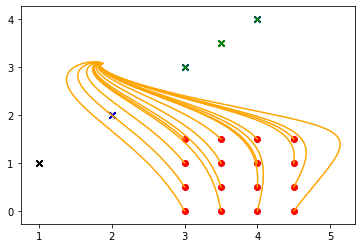

In [8]:
list_k = [1,2] 
list_k_1 = [2,3,4]
list_k_2 = [3,3.5,4]

for i in range(4):
    for j in range(4):
            z = FO_competitive_MAML(3+i/2,j/2,0.01,0.01)
            plt.scatter(np.array(list_k),np.array(list_k),marker='x',color='black')
            plt.scatter(np.array(list_k_1),np.array(list_k_1),marker='x',color='blue')
            plt.scatter(np.array(list_k_2),np.array(list_k_2),marker='x',color='green')

            plt.scatter(3+i/2,j/2,color='red')
            plt.plot(z[0],z[1],color = 'orange')

In [9]:
z[0][-1],z[1][-1]

(1.8740104041547847, 3.0748766107808305)

## Update rule for Competitive MAML:

###    $x_{k+1/2} = x_k-\eta_1 \nabla_x f(x_k,y_k)$
###    And, $x_{k+1} = x_k-\eta_2 \nabla_x f(x_{k+1/2},y_{k+1/2})*(I-\eta*\nabla^2_xf(x_k,y_k))$

###    $y_{k+1/2} = y_k-\eta_1 \nabla_y f(x_k,y_k)$
###    And, $y_{k+1} = y_k-\eta_2 \nabla_y f(x_{y+1/2},y_{k+1/2})*(I-\eta*\nabla^2_yf(x_k,y_k))$

In [10]:
def Competitive_MAML(x,y,lr1,lr2):
    xs = [x]
    ys = [y]
    for i in range(500):
        meta_grad=0
        for k in list_k:
            d = np.array((x,y))-lr1*oracle(x,y,k)
            meta_grad += oracle(d[0],d[1],k)*np.array([1-lr1*2,1-lr1*2])
        for k in list_k_1:
            d = np.array((x,y))-lr1*oracle_1(x,y,k)*np.array([1-lr1*2,1-lr1*2])
            meta_grad += oracle_1(d[0],d[1],k)*np.array([1-lr1*2,1-lr1*2])
        for k in list_k_2:
            d = np.array((x,y))-lr1*oracle_2(x,y,k)
            meta_grad += oracle_2(d[0],d[1],k)*np.array([1-lr1*2*(y-k),1-lr1*2])
#         return(meta_grad)
        x,y=np.array((x,y))-lr2*meta_grad
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [ ]:
list_k = [6,7] 
list_k_1 = [3,4]
list_k_2 = [4.5,5]

for i in range(4):
    for j in range(4):
            z = Competitive_MAML(3+i/2,j/2,0.01,0.01)
            plt.scatter(np.array(list_k),np.array(list_k),marker='x',color='black')
            plt.scatter(np.array(list_k_1),np.array(list_k_1),marker='x',color='blue')
            plt.scatter(np.array(list_k_2),np.array(list_k_2),marker='x',color='green')

            plt.scatter(3+i/2,j/2,color='red')
            plt.plot(z[0],z[1],color = 'orange')
            

for k in list_k:  
    x = z[0][-1]
    y = z[1][-1]
    itx = [x]
    ity = [y]
    for i in range(10):
        x,y = np.array((x,y))-lr1*oracle(x,y,k)
        itx.append(x)
        ity.append(y)
    plt.plot(itx,ity,color='black')  

for k in list_k_1:  
    x = z[0][-1]
    y = z[1][-1]
    itx = [x]
    ity = [y]
    for i in range(10):
        x,y = np.array((x,y))-lr1*oracle_1(x,y,k)
        itx.append(x)
        ity.append(y)
    plt.plot(itx,ity,color='blue')    

for k in list_k_2:  
    x = z[0][-1]
    y = z[1][-1]
    itx = [x]
    ity = [y]
    for i in range(10):
        x,y = np.array((x,y))-lr1*oracle_2(x,y,k)
        itx.append(x)
        ity.append(y)
    plt.plot(itx,ity,color='green')   
    


for l in range(1,3):
    for m in range(1,3):
        for k in list_k:  
            x = l+0.5
            y = m+0.5
            itx = [x]
            ity = [y]
            for i in range(10):
                x,y = np.array((x,y))-lr1*oracle(x,y,k)
                itx.append(x)
                ity.append(y)
            plt.plot(itx,ity,color='black')  

        for k in list_k_1:  
            x = l+0.5
            y = m+0.5
            itx = [x]
            ity = [y]
            for i in range(10):
                x,y = np.array((x,y))-lr1*oracle_1(x,y,k)
                itx.append(x)
                ity.append(y)
            plt.plot(itx,ity,color='blue')    

        for k in list_k_2:  
            x = l+0.5
            y = m+0.5
            itx = [x]
            ity = [y]
            for i in range(10):
                x,y = np.array((x,y))-lr1*oracle_2(x,y,k)
                itx.append(x)
                ity.append(y)
            plt.plot(itx,ity,color='green')   

